In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
# Approx. 4.75 million rows = half of 9.5M
traindata = pd.read_csv("GUIDE_Train.csv", nrows=4750000)

print("Loaded rows:", traindata.shape[0])


Loaded rows: 4750000


In [3]:
traindata

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749995,352187322271,20,2299,1115,2024-05-22T16:50:56.000Z,79,84,Impact,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4749996,790273983284,500,64097,206704,2024-06-05T00:36:56.000Z,2,2,CommandAndControl,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4749997,1546188228765,13,14254,9657,2024-06-05T10:56:21.000Z,34,1798,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4749998,936302871099,58,412,763,2024-06-05T22:48:58.000Z,11,9,InitialAccess,T1566,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [4]:
# display the maximum columns 
pd.set_option('display.max_columns',None)
traindata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,NaN,NaN,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,NaN,NaN,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [5]:
traindata.shape

(4750000, 45)

In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750000 entries, 0 to 4749999
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [ ]:
null_summary=pd.DataFrame({
    'Null Count':traindata.isna().sum(),
    'Null Percentage':(traindata.isna().sum()/len(traindata))*100
})
print(null_summary)

                    Null Count  Null Percentage
Id                           0         0.000000
OrgId                        0         0.000000
IncidentId                   0         0.000000
AlertId                      0         0.000000
Timestamp                    0         0.000000
DetectorId                   0         0.000000
AlertTitle                   0         0.000000
Category                     0         0.000000
MitreTechniques        2728514        57.442400
IncidentGrade            25644         0.539874
ActionGrouped          4722055        99.411684
ActionGranular         4722055        99.411684
EntityType                   0         0.000000
EvidenceRole                 0         0.000000
DeviceId                     0         0.000000
Sha256                       0         0.000000
IpAddress                    0         0.000000
Url                          0         0.000000
AccountSid                   0         0.000000
AccountUpn                   0         0

In [8]:
#drop the columns which contain more than 50%
thershold=len(traindata)*0.5 
traindata=traindata.dropna(thresh=thershold,axis=1)


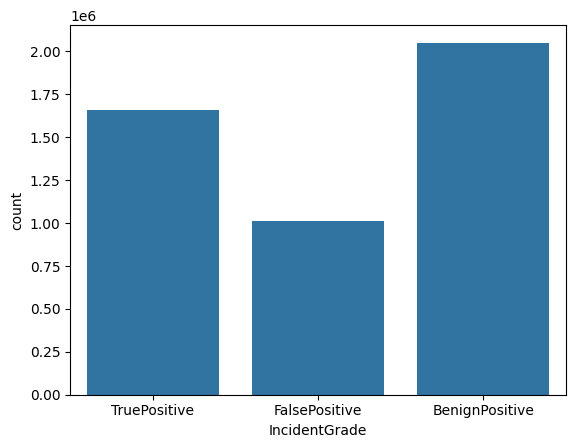

In [9]:
# Distribution of Target variable 
sns.countplot(x='IncidentGrade',data=traindata)
plt.show()

In [10]:
# count and percnetage calculation for each unique value in 'IncidnetGrade'

incidentgrade_summary= traindata['IncidentGrade'].value_counts(normalize=True).mul(100).to_frame(name='Percenatage') 
incidentgrade_summary['Count']=traindata['IncidentGrade'].value_counts()

# Reset index to have 'IncidentGrade' as a columns 
incidentgrade_summary= incidentgrade_summary.reset_index().rename(columns={'index':'IncidentGrade'})
print(incidentgrade_summary)

    IncidentGrade  Percenatage    Count
0  BenignPositive    43.407631  2050731
1    TruePositive    35.118374  1659117
2   FalsePositive    21.473996  1014508


In [11]:
# droppping row with null values in the 'IncidentGrade' columns

traindata=traindata.dropna(subset=['IncidentGrade'])

In [12]:
traindata.shape

(4724356, 35)

In [13]:
# checking for any duplicates 
duplicates= traindata[traindata.duplicated()]

# display duplicate rows, if any 
print(f"Number of duplicate rows :{len (duplicates)}")

Number of duplicate rows :155395


In [14]:
traindata.drop_duplicates(inplace=True)

In [15]:
traindata.shape

(4568961, 35)

In [16]:
traindata.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [17]:
traindata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630


In [18]:
traindata.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City
count,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06,4.568961e+06
mean,8.422502e+11,1.730131e+02,6.972284e+04,4.113620e+05,1.097164e+02,2.863775e+03,9.557184e+04,1.283927e+05,2.829535e+05,1.505964e+05,3.544491e+05,4.716486e+05,3.429599e+05,3.588495e+05,1.428962e+05,4.828675e+05,1.628058e+03,6.347255e+02,8.595434e+02,2.198938e+03,3.339713e+03,8.807793e+02,2.612793e+05,1.072315e+05,3.583360e+03,4.895956e+00,6.462138e+01,2.230450e+02,1.348257e+03,9.912272e+03
std,4.967044e+11,3.726980e+02,1.203347e+05,4.607876e+05,4.253520e+02,1.106021e+04,1.658206e+04,3.453034e+04,1.430780e+05,3.715143e+04,1.651788e+05,2.874406e+05,1.586301e+05,1.732787e+05,3.663006e+04,1.383155e+05,6.808390e+01,1.279485e+01,1.921711e+01,3.378628e+02,5.200419e+02,1.340788e+01,8.281971e+04,3.275778e+04,9.236917e+01,7.122002e-01,9.430051e+00,6.377699e+01,3.565656e+02,2.648162e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.123169e+11,9.000000e+00,4.630000e+02,2.138700e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,1.076160e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
50%,8.418136e+11,4.200000e+01,9.221000e+03,2.219770e+05,9.000000e+00,1.300000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
75%,1.271310e+12,1.610000e+02,8.189900e+04,6.862490e+05,4.600000e+01,1.950000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04
max,1.709397e+12,6.144000e+03,5.997040e+05,1.721450e+06,9.505000e+03,1.131680e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04


In [19]:
# summary statistics for catogarical features 
categorical_features=['Category','EntityType','EvidenceRole','IncidentGrade']
print(traindata[categorical_features].describe())

             Category EntityType EvidenceRole   IncidentGrade
count         4568961    4568961      4568961         4568961
unique             20         33            2               3
top     InitialAccess         Ip      Related  BenignPositive
freq          1986014    1086396      2485790         1969997


In [20]:
traindata.nunique()

Id                     641859
OrgId                    5241
IncidentId             421140
AlertId               1150072
Timestamp              718852
DetectorId               7365
AlertTitle              74601
Category                   20
IncidentGrade               3
EntityType                 33
EvidenceRole                2
DeviceId                54878
Sha256                  72860
IpAddress              195088
Url                     85155
AccountSid             265924
AccountUpn             394294
AccountObjectId        257882
AccountName            272434
DeviceName              80507
NetworkMessageId       259460
RegistryKey               918
RegistryValueName         398
RegistryValueData         504
ApplicationId            1064
ApplicationName          1679
OAuthApplicationId        455
FileName               142355
FolderPath              59636
ResourceIdName           1495
OSFamily                    6
OSVersion                  48
CountryCode               217
State     

In [21]:
# coverting timestamp to date time 
traindata['Timestamp']=pd.to_datetime(traindata['Timestamp'])

In [22]:
print(traindata['Timestamp'].dtype)
traindata['Timestamp'].head()

datetime64[ns, UTC]


0   2024-06-04 06:05:15+00:00
1   2024-06-14 03:01:25+00:00
2   2024-06-13 04:52:55+00:00
3   2024-06-10 16:39:36+00:00
4   2024-06-15 01:08:07+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [23]:
# extracting date month year hour and time from timestamp

traindata['Day']=traindata['Timestamp'].dt.day
traindata['Month']=traindata['Timestamp'].dt.month
traindata['Year']=traindata['Timestamp'].dt.year
traindata['Hour']=traindata['Timestamp'].dt.hour
traindata['Time']=traindata['Timestamp'].dt.time

traindata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,180388628218,0,612,123247,2024-06-04 06:05:15+00:00,7,6,InitialAccess,TruePositive,Ip,Related,98799,138268,27,160396,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,31,6,3,4,6,2024,6,06:05:15
1,455266534868,88,326,210035,2024-06-14 03:01:25+00:00,58,43,Exfiltration,FalsePositive,User,Impacted,98799,138268,360606,160396,22406,23032,22795,24887,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,14,6,2024,3,03:01:25
2,1056561957389,809,58352,712507,2024-06-13 04:52:55+00:00,423,298,InitialAccess,FalsePositive,Url,Related,98799,138268,360606,68652,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,13,6,2024,4,04:52:55
3,1279900258736,92,32992,774301,2024-06-10 16:39:36+00:00,2,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,13,441377,673934,425863,453297,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,10,6,2024,16,16:39:36
4,214748368522,148,4359,188041,2024-06-15 01:08:07+00:00,9,74,Execution,TruePositive,User,Impacted,98799,138268,360606,160396,449,592,440,479,153085,529644,1631,635,860,2251,3421,881,289573,117668,3586,5,66,242,1445,10630,15,6,2024,1,01:08:07


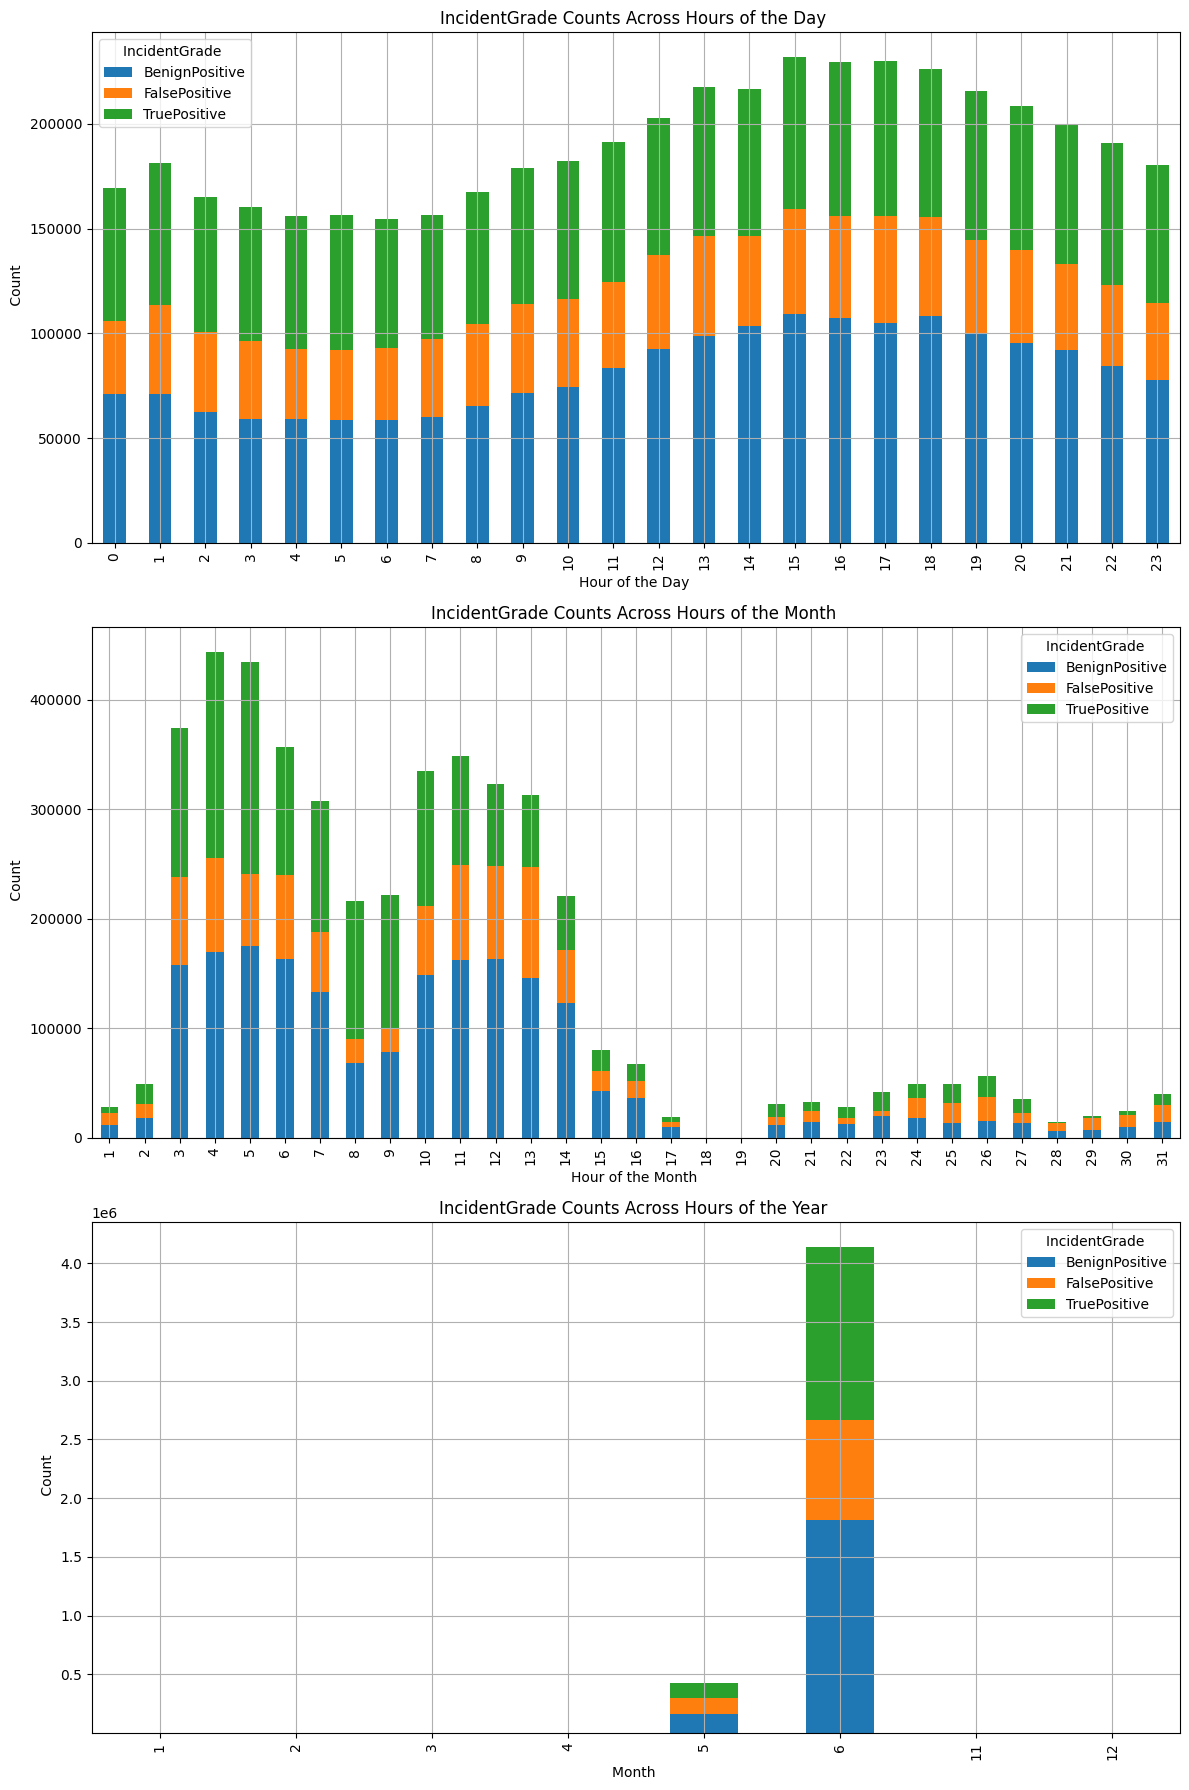

In [24]:
# aggregate data 
hour_incidnet_grade=traindata.groupby(['Hour','IncidentGrade']).size().unstack()
day_incidnet_grade=traindata.groupby(['Day','IncidentGrade']).size().unstack()
month_incidnet_grade=traindata.groupby(['Month','IncidentGrade']).size().unstack()

# create subplots \
fig,axes = plt.subplots(3,1 ,figsize=(12,18))

# Hourly distribution (stacked bar plots)

hour_incidnet_grade.plot(kind='bar',stacked=True,ax=axes[0])
axes[0].set_title('IncidentGrade Counts Across Hours of the Day ')
axes[0].set_xlabel('Hour of the Day ')
axes[0].set_ylabel(' Count')
axes[0].legend(title='IncidentGrade ')
axes[0].grid(True)


# Daily distribution (stacked bar plots)

day_incidnet_grade.plot(kind='bar',stacked=True,ax=axes[1])
axes[1].set_title('IncidentGrade Counts Across Hours of the Month ')
axes[1].set_xlabel('Hour of the Month ')
axes[1].set_ylabel(' Count')
axes[1].legend(title='IncidentGrade ')
axes[1].grid(True)


# Monthly distribution (stacked bar plots)

month_incidnet_grade.plot(kind='bar',stacked=True,ax=axes[2])
axes[2].set_title('IncidentGrade Counts Across Hours of the Year ')
axes[2].set_xlabel('Month ')
axes[2].set_ylabel(' Count')
axes[2].legend(title='IncidentGrade ')
axes[2].grid(True)

# adjust layout 
plt.tight_layout()
plt.show()


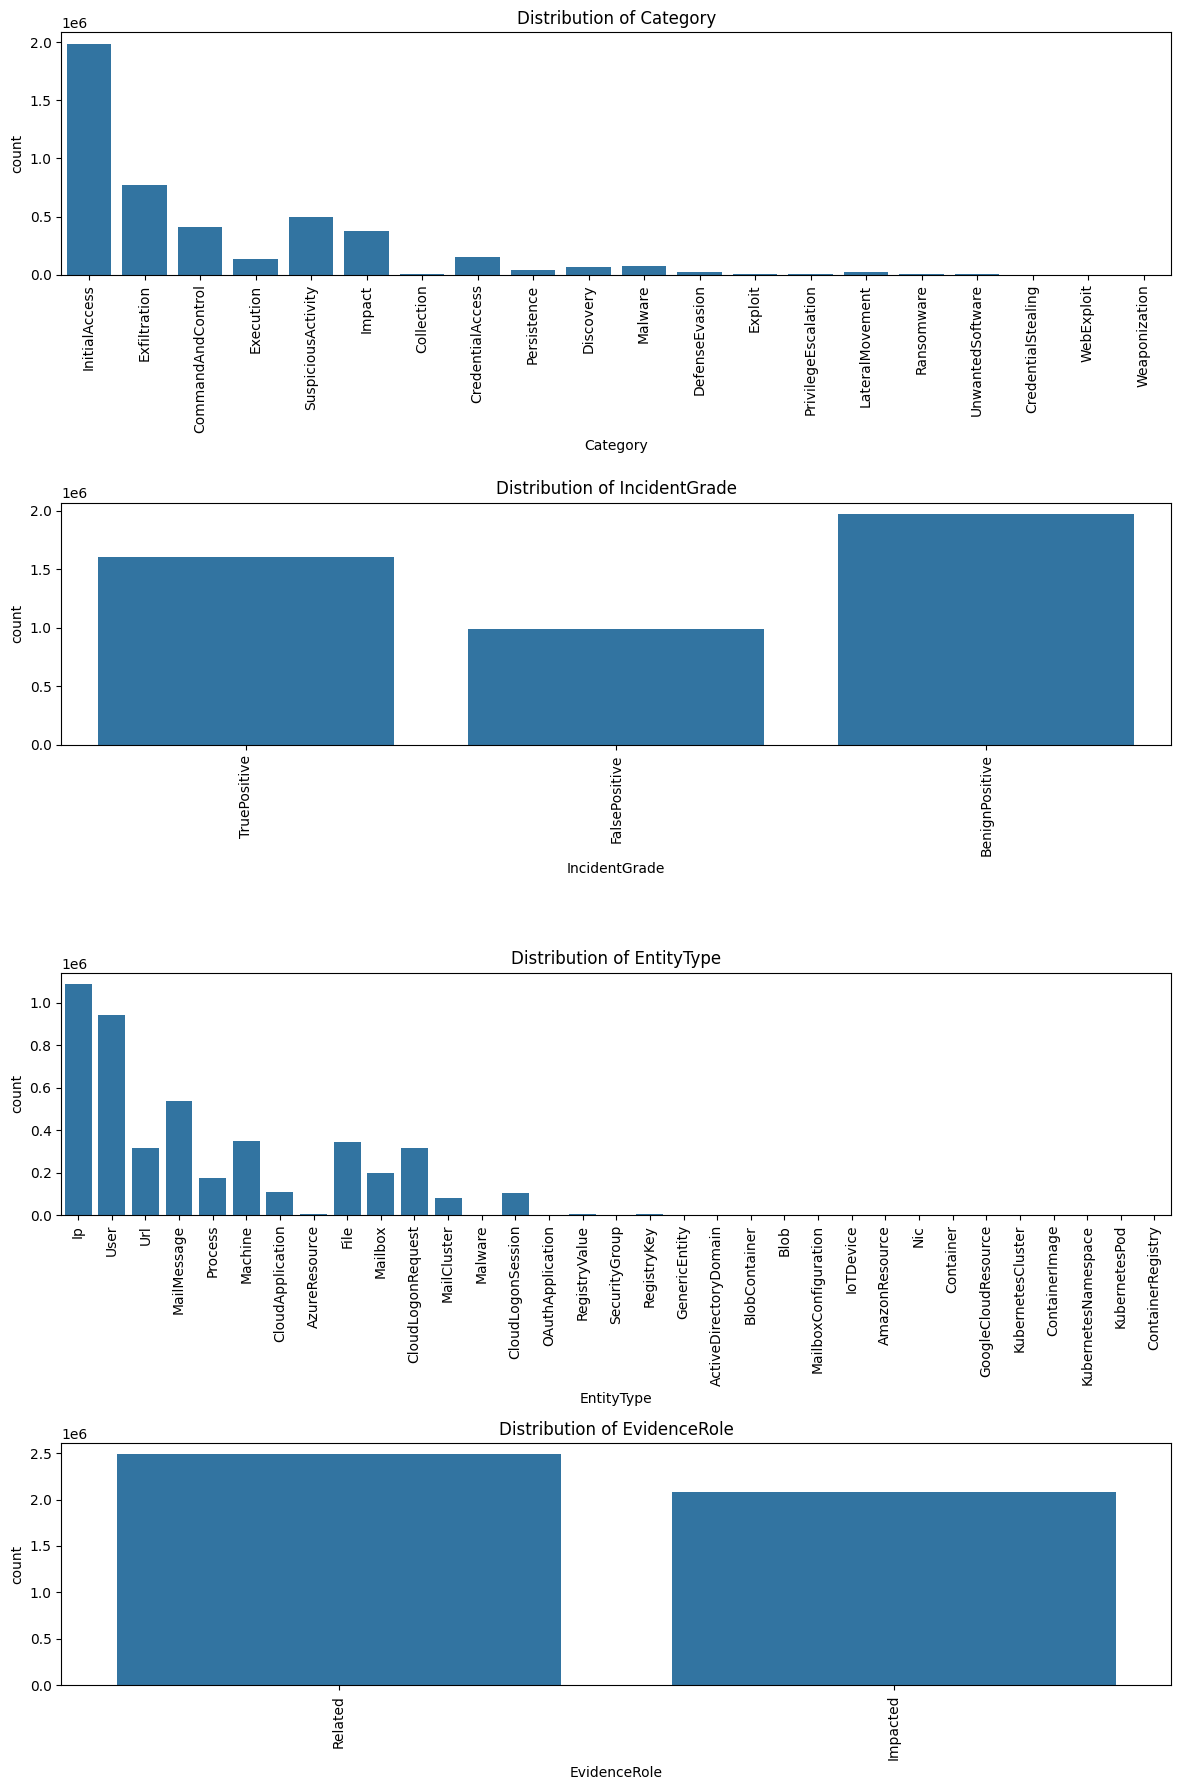

In [25]:
# Categorical coluns 
 
categorical_columns=['Category','IncidentGrade','EntityType','EvidenceRole']

# creat subplots for each categorical column
fig,axes=plt.subplots(4,1,figsize=(12,18))

# plot each columns as a count plot 
for i, columns in enumerate(categorical_columns):
    sns.countplot(x=columns,data=traindata,ax=axes[i])
    axes[i].set_title(f'Distribution of {columns}')
    axes[i].set_xlabel(columns)
    axes[i].set_ylabel('count')
    axes[i].tick_params(axis='x',rotation=90) 


# adjust layouts to prevnt overlap 

plt.tight_layout()
plt.show()

In [26]:
numeric_columns=traindata.select_dtypes(include=['float64','int64']).columns
numeric_columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'DetectorId', 'AlertTitle',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City'],
      dtype='object')

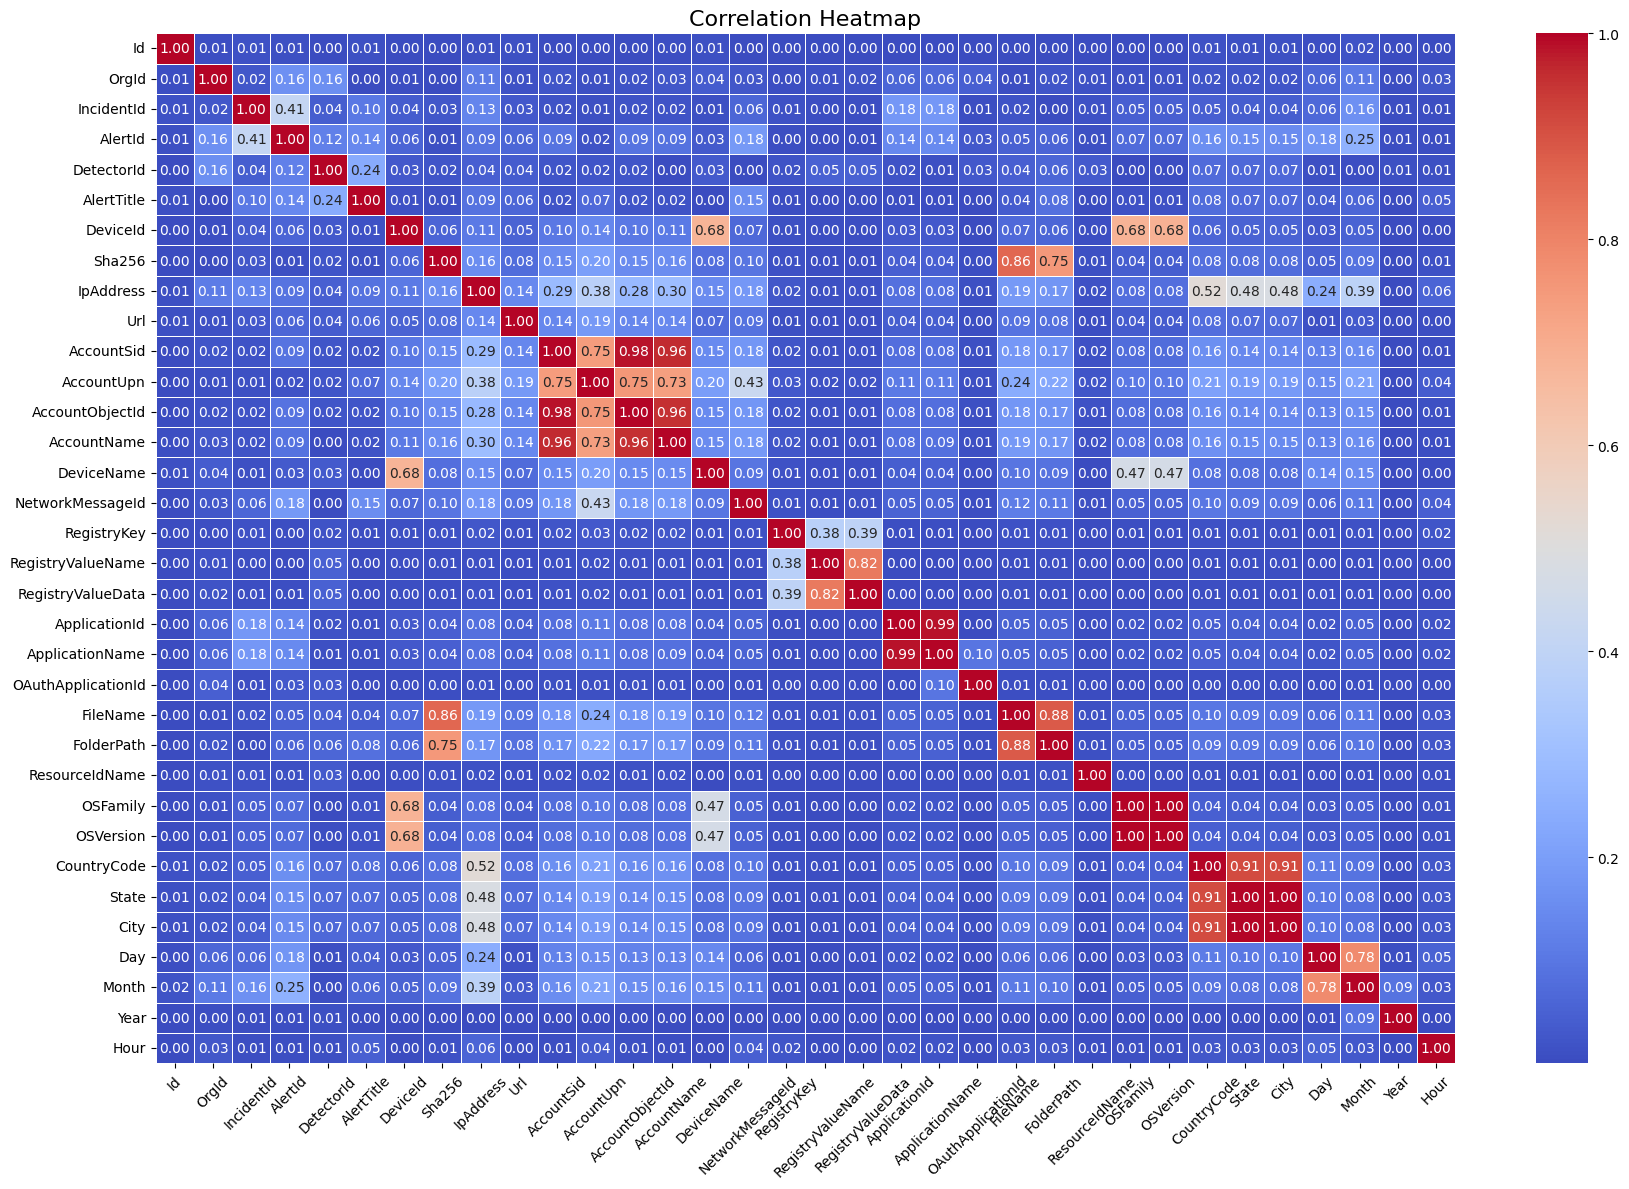

In [27]:
# Select numerical columns
numeric_df = traindata.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr().abs()

# Plot the heatmap with correct figure size and rendering
plt.figure(figsize=(18, 12))  # Use this instead of plt.Figure()
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=True)

plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [28]:
#Droping Highlu Correlated columns
traindata.drop(['Sha256','AccountSid','AccountUpn','AccountObjectId','RegistryValueName','ApplicationId','FolderPath','CountryCode','State','Month','OSFamily','DeviceId','Timestamp'],axis=1,inplace=True)

In [29]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4568961 entries, 0 to 4749999
Data columns (total 27 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Id                  int64 
 1   OrgId               int64 
 2   IncidentId          int64 
 3   AlertId             int64 
 4   DetectorId          int64 
 5   AlertTitle          int64 
 6   Category            object
 7   IncidentGrade       object
 8   EntityType          object
 9   EvidenceRole        object
 10  IpAddress           int64 
 11  Url                 int64 
 12  AccountName         int64 
 13  DeviceName          int64 
 14  NetworkMessageId    int64 
 15  RegistryKey         int64 
 16  RegistryValueData   int64 
 17  ApplicationName     int64 
 18  OAuthApplicationId  int64 
 19  FileName            int64 
 20  ResourceIdName      int64 
 21  OSVersion           int64 
 22  City                int64 
 23  Day                 int32 
 24  Year                int32 
 25  Hour                int

In [30]:
traindata.shape

(4568961, 27)

In [31]:
# cheking unique values in columns 
columns=traindata.select_dtypes(include=['float64','int64','object']).columns

In [32]:
for col in columns:
    # print the number of unique values in each column 
    unique_count=traindata[col].nunique()
    print(f"'{col}':{unique_count}")

'Id':641859
'OrgId':5241
'IncidentId':421140
'AlertId':1150072
'DetectorId':7365
'AlertTitle':74601
'Category':20
'IncidentGrade':3
'EntityType':33
'EvidenceRole':2
'IpAddress':195088
'Url':85155
'AccountName':272434
'DeviceName':80507
'NetworkMessageId':259460
'RegistryKey':918
'RegistryValueData':504
'ApplicationName':1679
'OAuthApplicationId':455
'FileName':142355
'ResourceIdName':1495
'OSVersion':48
'City':7114
'Time':86400


In [33]:
# encoding categorical variables 

categorical=traindata.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder=LabelEncoder()
    traindata[feature]=encoder.fit_transform(traindata[feature])

traindata.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time
0,180388628218,0,612,123247,7,6,10,2,15,1,27,160396,453297,153085,529644,1631,860,3421,881,289573,3586,66,3,4,2024,6,21915
1,455266534868,88,326,210035,58,43,7,1,32,0,360606,160396,24887,153085,529644,1631,860,3421,881,289573,3586,66,10630,14,2024,3,10885
2,1056561957389,809,58352,712507,423,298,10,1,31,1,360606,68652,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630,13,2024,4,17575
3,1279900258736,92,32992,774301,2,2,1,0,31,1,360606,13,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630,10,2024,16,59976
4,214748368522,148,4359,188041,9,74,6,2,32,0,360606,160396,479,153085,529644,1631,860,3421,881,289573,3586,66,10630,15,2024,1,4087


In [34]:
traindata.to_csv('traindata_processed.csv',index=False)

# Testdata

In [35]:
# importing test data 

testdata=pd.read_csv('GUIDE_Test.csv')
testdata.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_324\1774727551.py:3: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  testdata=pd.read_csv('GUIDE_Test.csv')


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [36]:
testdata.shape

(4147992, 46)

In [37]:
testdata.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [38]:
# converting timestamp to data time 

testdata['Timestamp']=pd.to_datetime(testdata['Timestamp'])

In [39]:
print(testdata['Timestamp'].dtype)

testdata['Timestamp'].head()

datetime64[ns, UTC]


0   2024-06-04 22:56:27+00:00
1   2024-06-03 12:58:26+00:00
2   2024-06-08 03:20:49+00:00
3   2024-06-12 12:07:31+00:00
4   2024-06-06 17:42:05+00:00
Name: Timestamp, dtype: datetime64[ns, UTC]

In [40]:
# Extracting day , month , year , hor , and time  from timestamp 

testdata['Day']=testdata['Timestamp'].dt.day
testdata['Month']=testdata['Timestamp'].dt.month
testdata['Year']=testdata['Timestamp'].dt.year
testdata['Hour']=testdata['Timestamp'].dt.hour
testdata['Time']=testdata['Timestamp'].dt.time

testdata.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,ActionGrouped,ActionGranular,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,ThreatFamily,FileName,FolderPath,ResourceIdName,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,2024-06-04 22:56:27+00:00,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,2610,3699,425863,863,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private,4,6,2024,22,22:56:27
1,1400159342154,3,91158,632273,2024-06-03 12:58:26+00:00,2,2,CommandAndControl,NaN,BenignPositive,NaN,NaN,Machine,Impacted,1239,138268,360606,160396,441377,673934,425863,453297,2833,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public,3,6,2024,12,12:58:26
2,1279900255923,145,32247,131719,2024-06-08 03:20:49+00:00,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,NaN,NaN,Process,Related,98799,4296,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,14,22,3586,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public,8,6,2024,3,03:20:49
3,60129547292,222,15294,917686,2024-06-12 12:07:31+00:00,0,0,InitialAccess,T1078;T1078.004,FalsePositive,NaN,NaN,CloudLogonSession,Related,98799,138268,360606,160396,441377,673934,425863,453297,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public,12,6,2024,12,12:07:31
4,515396080539,363,7615,5944,2024-06-06 17:42:05+00:00,27,18,Discovery,T1087;T1087.002,BenignPositive,NaN,NaN,User,Impacted,98799,138268,360606,160396,133549,673934,425863,136104,153085,529644,NaN,1631,635,860,2251,3421,881,NaN,289573,117668,3586,NaN,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public,6,6,2024,17,17:42:05


In [41]:
testdata.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,AccountSid,AccountUpn,AccountObjectId,AccountName,DeviceName,NetworkMessageId,EmailClusterId,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,ApplicationName,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour
count,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.170700e+04,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06,4.147992e+06
mean,8.462250e+11,1.756698e+02,6.780345e+04,4.072191e+05,1.008391e+02,2.529514e+03,9.575061e+04,1.283939e+05,2.873898e+05,1.504279e+05,3.532813e+05,4.706754e+05,3.419357e+05,3.582316e+05,1.417392e+05,4.834652e+05,3.231065e+09,1.627532e+03,6.345193e+02,8.592115e+02,2.200962e+03,3.342993e+03,8.808119e+02,2.618998e+05,1.074020e+05,3.583541e+03,4.899529e+00,6.466873e+01,2.222218e+02,1.344570e+03,9.883839e+03,9.670986e+00,5.906993e+00,2.024000e+03,1.223751e+01
std,4.923351e+11,3.708729e+02,1.178736e+05,4.550578e+05,4.082934e+02,1.044138e+04,1.615628e+04,3.457595e+04,1.400920e+05,3.734754e+04,1.660976e+05,2.885003e+05,1.595671e+05,1.738693e+05,3.868470e+04,1.368565e+05,1.043861e+09,7.382003e+01,1.721417e+01,2.552240e+01,3.313870e+02,5.096996e+02,1.238317e+01,8.208434e+04,3.260346e+04,9.012124e+01,7.001299e-01,9.269678e+00,6.499822e+01,3.626851e+02,2.696302e+03,6.212267e+00,2.934618e-01,3.771412e-03,6.760928e+00
min,1.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.927080e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.023000e+03,0.000000e+00
25%,4.209068e+11,8.000000e+00,4.110000e+02,2.365900e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,1.015320e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,2.688174e+09,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,5.000000e+00,6.000000e+00,2.024000e+03,7.000000e+00
50%,8.418136e+11,4.300000e+01,8.818000e+03,2.228970e+05,7.000000e+00,9.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,3.492818e+09,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,8.000000e+00,6.000000e+00,2.024000e+03,1.300000e+01
75%,1.271310e+12,1.730000e+02,7.944000e+04,6.711010e+05,3.900000e+01,1.160000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,4.108874e+09,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,1.200000e+01,6.000000e+00,2.024000e+03,1.800000e+01
max,1.709397e+12,6.138000e+03,5.997000e+05,1.721457e+06,9.520000e+03,1.131690e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,4.413770e+05,6.739340e+05,4.258630e+05,4.532970e+05,1.530850e+05,5.296440e+05,4.294964e+09,1.631000e+03,6.350000e+02,8.600000e+02,2.251000e+03,3.421000e+03,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,3.100000e

In [42]:
testdata.drop(['Sha256','AccountSid','AccountUpn','AccountObjectId','RegistryValueName','ApplicationId','FolderPath','CountryCode','State','Month','OSFamily','DeviceId','Timestamp','MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict','Usage'],axis=1,inplace=True)

In [43]:

testdata.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,360606,160396,863,153085,529644,1631,860,3421,881,289573,3586,66,10630,4,2024,22,22:56:27
1,1400159342154,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,360606,160396,453297,2833,529644,1631,860,3421,881,289573,3586,0,10630,3,2024,12,12:58:26
2,1279900255923,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,360606,160396,453297,153085,529644,1631,860,3421,881,14,3586,66,10630,8,2024,3,03:20:49
3,60129547292,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,360606,160396,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630,12,2024,12,12:07:31
4,515396080539,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,360606,160396,136104,153085,529644,1631,860,3421,881,289573,3586,66,10630,6,2024,17,17:42:05


In [44]:
testdata.shape

(4147992, 27)

In [45]:
testdata.dtypes

Id                     int64
OrgId                  int64
IncidentId             int64
AlertId                int64
DetectorId             int64
AlertTitle             int64
Category              object
IncidentGrade         object
EntityType            object
EvidenceRole          object
IpAddress              int64
Url                    int64
AccountName            int64
DeviceName             int64
NetworkMessageId       int64
RegistryKey            int64
RegistryValueData      int64
ApplicationName        int64
OAuthApplicationId     int64
FileName               int64
ResourceIdName         int64
OSVersion              int64
City                   int64
Day                    int32
Year                   int32
Hour                   int32
Time                  object
dtype: object

In [46]:
# encoding categorical variables 

categorical=testdata.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder=LabelEncoder()
    testdata[feature]=encoder.fit_transform(testdata[feature])

testdata.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,IpAddress,Url,AccountName,DeviceName,NetworkMessageId,RegistryKey,RegistryValueData,ApplicationName,OAuthApplicationId,FileName,ResourceIdName,OSVersion,City,Day,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,360606,160396,863,153085,529644,1631,860,3421,881,289573,3586,66,10630,4,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,360606,160396,453297,2833,529644,1631,860,3421,881,289573,3586,0,10630,3,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,360606,160396,453297,153085,529644,1631,860,3421,881,14,3586,66,10630,8,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,360606,160396,453297,153085,529644,1631,860,3421,881,289573,3586,66,10630,12,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,360606,160396,136104,153085,529644,1631,860,3421,881,289573,3586,66,10630,6,2024,17,63665


In [47]:
testdata.to_csv('testdata_processed.csv',index=False)